In [58]:
ls NewCSVs

Billing.csv           Lab.csv               Referral.csv
DiseaseCase.csv       MedicalProcedure.csv  RiskFactor.csv
Exam.csv              Medication.csv        Vaccine.csv
HealthCondition.csv   Patient.csv


## Initial Features to consider

#### Skip for now
- Disease_Case - all diabetes
- Referral -7 rows
- Vaccine - tetanus shots

#### Focus on:
- Billing
- Exam
- Health_Condition
- Lab
- Medical_Procedure
- Medication
- Patient
- Risk_Factor

#### Assignments
**Nick** - Exam, Lab 

**Ellie** - Patient, Risk_Factor

**Susan** - Health_Condition, Medical

**David** - Billing, Medication

In [13]:
import pandas as pd

#Import data into dataframes
Billing = pd.read_csv("NewCSVs/Billing.csv")
DiseaseCase = pd.read_csv("NewCSVs/DiseaseCase.csv")  #All diabetes 
Exam = pd.read_csv("NewCSVs/Exam.csv")
HealthCondition = pd.read_csv("NewCSVs/HealthCondition.csv")
Lab = pd.read_csv("NewCSVs/Lab.csv")
MP = pd.read_csv("NewCSVs/MedicalProcedure.csv")
Medication = pd.read_csv("NewCSVs/Medication.csv")
Patient = pd.read_csv("NewCSVs/Patient.csv")
Referral = pd.read_csv("NewCSVs/Referral.csv")
RiskFactor = pd.read_csv("NewCSVs/RiskFactor.csv")
Vaccine = pd.read_csv("NewCSVs/Vaccine.csv")

#Store in list
csvs = [Billing, DiseaseCase, Exam, HealthCondition, Lab, MP, Medication, Patient, Referral, RiskFactor, Vaccine]


In [15]:
#Check Column headers
for x in csvs :
    print(x.columns)

Index(['Billing_ID', 'Network_ID', 'Site_ID', 'Patient_ID', 'OriginalEMRID',
       'EncounterID', 'ServiceDate', 'ServiceCode', 'DiagnosisText_orig',
       'DiagnosisText_calc', 'DiagnosisCodeType_orig',
       'DiagnosisCodeType_calc', 'DiagnosisCode_orig', 'DiagnosisCode_calc',
       'DateCreated', 'DiagnosisCode_calc_3_dgt'],
      dtype='object')
Index(['DiseaseCase_ID', 'Patient_ID', 'Disease', 'DateOfOnset'], dtype='object')
Index(['Exam_ID', 'Network_ID', 'Site_ID', 'Patient_ID', 'OriginalEMRID',
       'Encounter_ID', 'Exam1', 'Result1_orig', 'Result1_calc', 'Exam2',
       'Result2_orig', 'Result2_calc', 'UnitOfMeasure_orig',
       'UnitOfMeasure_calc', 'PairingMethod', 'DateCreated'],
      dtype='object')
Index(['HealthCondition_ID', 'Network_ID', 'Site_ID', 'Patient_ID',
       'OriginalEMRID', 'Encounter_ID', 'DiagnosisText_orig',
       'DiagnosisText_calc', 'DiagnosisCodeType_orig',
       'DiagnosisCodeType_calc', 'DiagnosisCode_orig', 'DiagnosisCode_calc',
       '

In [37]:
#Number of visits per patient
patientCounts = {}
for index, row in Billing.iterrows() :
    temp = str(row['Patient_ID'])
    if temp not in patientCounts.keys() :
        patientCounts[temp] = 1
    else :
        patientCounts[temp] = patientCounts[temp] + 1
        
print(min(patientCounts.values()), max(patientCounts.values()))

5 319


In [34]:
import matplotlib.pyplot as plt

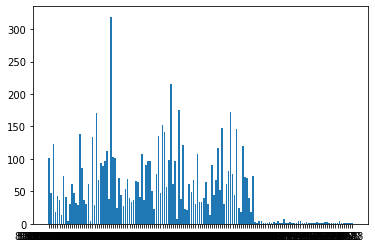

In [52]:
#Print plot of hospital visits
patientCountsS = {k: v for k, v in sorted(patientCounts.items(), key=lambda item: item[1])}

plt.bar(range(len(patientCounts)), list(patientCounts.values()), align='center')
plt.xticks(range(len(patientCounts)), list(patientCounts.keys()))

plt.show()


In [59]:
# Number of unique diagnosis' in Billing
uniqDiag = Billing['DiagnosisText_calc'].unique()
uniqDiag.size

744

In [60]:
# Number of unique diagnosis' in Health_Condition
uniqDiagHC = HealthCondition['DiagnosisText_calc'].unique()
uniqDiagHC.size

609

In [50]:
# Patient birthdays
ages = {}
for index, row in Patient.iterrows() :
    temp = str(row['BirthYear'])
    if temp not in ages.keys() :
        ages[temp] = 1
    else :
        ages[temp] = ages[temp] + 1

In [56]:
ages

{'1970': 3,
 '1978': 1,
 '1967': 4,
 '1992': 4,
 '1971': 2,
 '1972': 2,
 '1997': 2,
 '1993': 3,
 '1973': 1,
 '1976': 3,
 '1982': 1,
 '1995': 4,
 '1953': 2,
 '1957': 1,
 '1990': 7,
 '1959': 2,
 '1969': 1,
 '1954': 3,
 '1937': 1,
 '1923': 1,
 '1998': 2,
 '1961': 4,
 '1964': 4,
 '1965': 2,
 '1952': 1,
 '1991': 3,
 '1948': 1,
 '1994': 1,
 '1966': 1,
 '1980': 1,
 '1963': 3,
 '1943': 2,
 '1956': 2,
 '1974': 1,
 '1962': 3,
 '1989': 3,
 '1944': 2,
 '1960': 2,
 '1958': 1,
 '1934': 1,
 '1938': 1,
 '1996': 5,
 '1930': 1,
 '1977': 1,
 '1951': 1,
 '1955': 1,
 '1940': 1,
 '1988': 1}

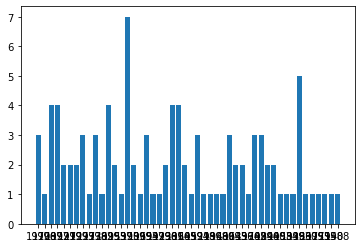

In [53]:
# Plot birthdays
plt.bar(range(len(ages)), list(ages.values()), align='center')
plt.xticks(range(len(ages)), list(ages.keys()))

plt.show()